In [29]:
import numpy as np
from cvxpy import *
import matplotlib.pyplot as plt
cities = ['Atlanta','Boston', 'Calgary', 'Charleston','Chicago','Dallas', 
          'Denver', 'Duluth', 'ElPaso','Helena', 'Houston', 'KansasCity', 'LasVegas',
          'LittleRock', 'LosAngeles', 'Miami', 'Montreal', 'Nashville',
          'NewOrleans', 'NewYork', 'OklahomaCity', 'Omaha', 'Phoenix',
          'Pittsburgh', 'Portland', 'Raleigh', 'SaintLouis','SaltLakeCity',
          'SanFrancisco','SantaFe', 'SaultStMarie', 'Seattle', 'Toronto',
          'Vancouver', 'Washington', 'Winnipeg'];

blue = ['Winnipeg','Helena',4,
    'Portland','SaltLakeCity',6,
    'Omaha','Chicago',4,
    'Montreal','NewYork',3,
    'KansasCity','SaintLouis',2,
    'SantaFe','OklahomaCity',3,
    'Atlanta','Miami',5];

blue = GetMatrix(blue,cities);

white = ['Calgary','Winnipeg',6,
    'Chicago','Toronto',4,
    'SaintLouis','Chicago',2,
    'Pittsburgh','NewYork',2,
    'SanFrancisco','SaltLakeCity',5,
    'Phoenix','Denver',5,
    'LittleRock','Nashville',3];

white = GetMatrix(white,cities);

green = ['Portland','SanFrancisco',5,
    'Helena','Denver',4,
    'SaintLouis','Pittsburgh',5,
    'LittleRock','NewOrleans',3,
    'ElPaso','Houston',6];

green = GetMatrix(green,cities);

red = ['Helena','Omaha',5,
    'Denver','OklahomaCity',4,
    'ElPaso','Dallas',4,
    'NewOrleans','Miami',6,
    'NewYork','Boston',2,
    'Duluth','Chicago',3];

red = GetMatrix(red,cities);

purple = ['Helena','SaltLakeCity',3,
    'Denver','Omaha',4,
    'Duluth','Toronto',6,
    'Charleston','Miami',4,
    'SanFrancisco','LosAngeles',3];
purple = GetMatrix(purple,cities);

orange = ['LasVegas','SaltLakeCity',3,
    'Helena','Duluth',6,
    'Chicago','Pittsburgh',3,
    'Denver','KansasCity',4,
    'NewYork','Washington',2,
    'Atlanta','NewOrleans',4];

orange = GetMatrix(orange,cities);

black = ['LosAngeles','ElPaso',6,
    'Winnipeg','Duluth',4,
    'SaultStMarie','Montreal',5,
    'Nashville','Raleigh',3];

black = GetMatrix(black,cities);

yellow = ['Seattle','Helena',6,
    'ElPaso','OklahomaCity',5,
    'Nashville','Pittsburgh',4];

yellow = GetMatrix(yellow,cities);

gray = ['Vancouver','Seattle',1,
    'Portland','Seattle',1,
    'Vancouver','Calgary',3,
    'Seattle','Calgary',4,
    'Calgary','Helena',4,
    'Winnipeg','SaultStMarie',6,
    'Duluth','SaultStMarie',3,
    'SaultStMarie','Toronto',2,
    'Toronto','Montreal',3,
    'Montreal','Boston',2,
    'Toronto','Pittsburgh',2,
    'LasVegas','LosAngeles',2,
    'LosAngeles','Phoenix',3,
    'Phoenix','ElPaso',3,
    'ElPaso','SantaFe',2,
    'Phoenix','SantaFe',3,
    'SantaFe','Denver',2,
    'Duluth','Omaha',2,
    'Omaha','KansasCity',1,
    'KansasCity','OklahomaCity',2,
    'OklahomaCity','Dallas',2,
    'Dallas','Houston',1,
    'Houston','NewOrleans',2,
    'Dallas','LittleRock',2,
    'OklahomaCity','LittleRock',2,
    'LittleRock','SaintLouis',2,
    'SaintLouis','Nashville',2,
    'Nashville','Atlanta',1,
    'Atlanta','Charleston',2,
    'Charleston','Raleigh',2,
    'Atlanta','Raleigh',2,
    'Raleigh','Washington',2,
    'Raleigh','Pittsburgh',2,
    'Washington','Pittsburgh',2];

gray = GetMatrix(gray,cities);

profit = blue*1.0+white*1.5+green*2.0+red*2.0+purple*2.5+orange*1.0+black*1.0+yellow*2.0+gray*1.0;

#TODO: symmetrize the matrix if necessary by uncommenting the next line
profit_sym = np.dstack([profit, profit.transpose()]).max(axis=2)

costs = np.ones((len(cities),1))*10;

#TODO put your solution here

In [30]:
def GetMatrix(links,cities):

    A = np.zeros((len(cities), len(cities)));
    for i in xrange(0, len(links), 3):
        A[cities.index(links[i]), cities.index(links[i + 1])] =  links[i+2]
           
    return A        

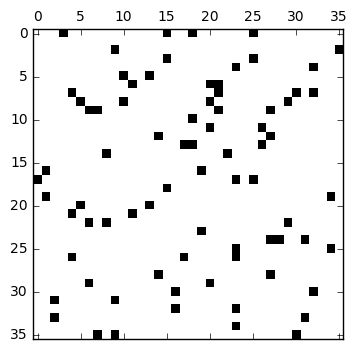

In [46]:
plt.spy(profit)
plt.show()

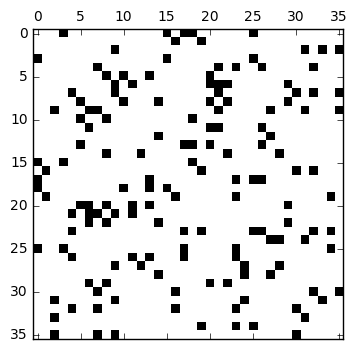

In [48]:
plt.spy(profit_sym)
plt.show()

In [43]:
x = t
obj = Maximize((trace(profit_sym.T * F) - sum_entries(F * costs)))
constraints = [F == F.T]
prob = Problem(obj, constraints)
prob.solve()
print prob.value
Fval = np.round(F.value, 5)

22.0


In [41]:
is_open = np.zeros(36)
for i in range(36):
    for j in range(36):
        if Fval[i][j] != 0:
            is_open[i] = 1
            is_open[j] = 1

In [42]:
print is_open

[ 0.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  1.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.]


In [ ]:
arshak = np.array([ 1,  0,  1.,  1.,  1.,  1. , 1. , 1. , 1. , 1.,  1.  ,0. , 0. , 1. , 1.,  1.,  0. , 1.,
   1. , 0.,  1. , 1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.])

